In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


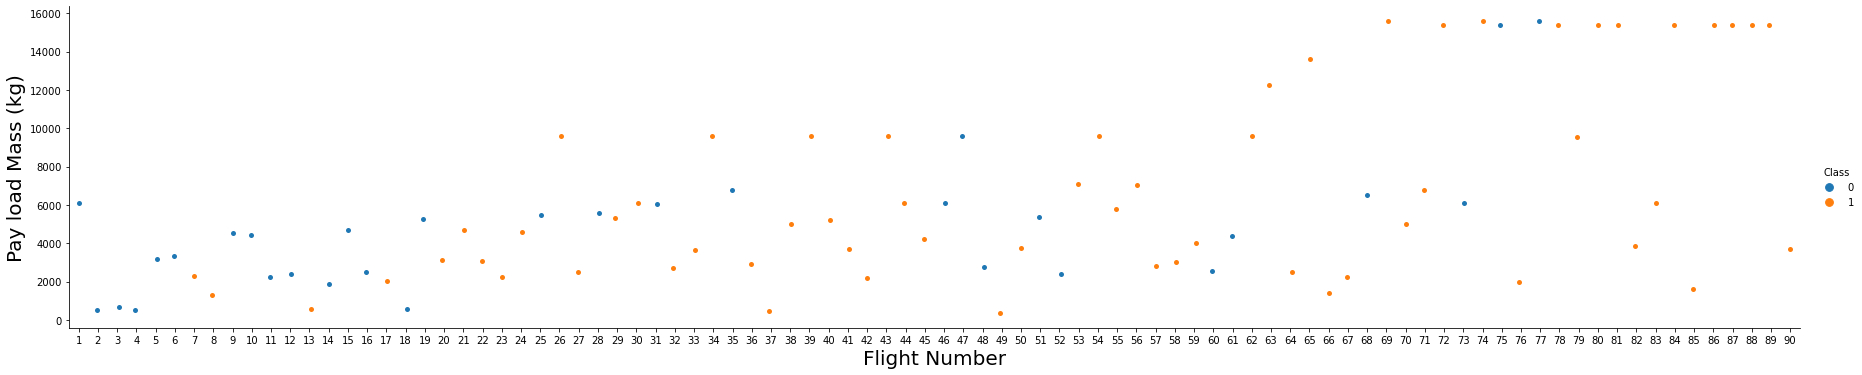

In [3]:
#
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [4]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [5]:
extracted_years = Extract_year(None)


Text(0, 0.5, 'Percentage of Success')

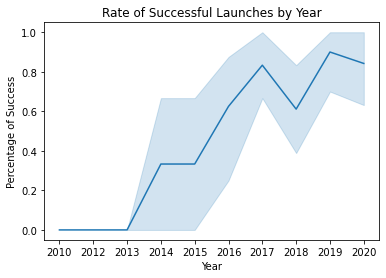

In [6]:
sns.lineplot(x=extracted_years, y=df['Class'])
plt.title('Rate of Successful Launches by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Success')

In [7]:
test_df = df.copy(deep=True)



temp_1 = test_df[test_df['Reused'] == True]['Class'].value_counts()

temp_2 = test_df[test_df['Reused'] == False]['Class'].value_counts()

print('Reused Rocket Success Rate: {}%'.format(round(temp_1[1] / temp_1.sum(), 3) * 100))
print('Reused Rocket Success Rate: {}%'.format(round(temp_2[1] / temp_2.sum(), 3) * 100))

Reused Rocket Success Rate: 78.4%
Reused Rocket Success Rate: 58.5%


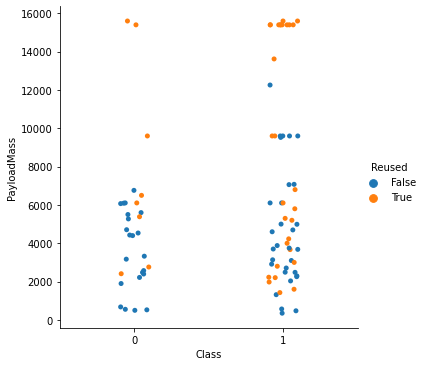

In [8]:
sns.catplot(y='PayloadMass', x='Class', hue='Reused', data=df)

# Point 1: Relationship between Flight Number and Launch Site

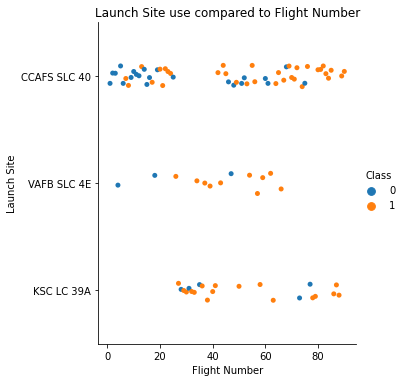

,Success Rate (%)
CCAFS SLC 40,60.0
VAFB SLC 4E,77.3
KSC LC 39A,76.9


In [9]:
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df)
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Launch Site use compared to Flight Number')
plt.show()

df_1 = df[['LaunchSite', 'Class']].groupby('LaunchSite').mean().apply(lambda x: x * 100)
df_1 = df_1.apply(lambda x : round(x, 1))
df_1.index = ['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A']
df_1.rename(columns={'Class' : 'Success Rate (%)'}, inplace=True)
df_1

#KSC LC 39A only started being used on the 27th launch, 2017-02-19

In [10]:
df[df['LaunchSite'] == 'CCAFS SLC 40']

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0
10,11,2014-09-21,Falcon 9,2216.000000,ISS,CCAFS SLC 40,False Ocean,1,False,False,False,NaN,1.0,0,B1010,-80.577366,28.561857,0


# Point 2: Relationship between Payload and Launch Site


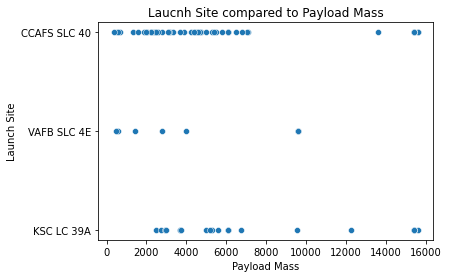

In [11]:
sns.scatterplot(x='PayloadMass', y='LaunchSite', data=df)
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.title('Laucnh Site compared to Payload Mass')

plt.show()

#CCAFS SLC 40 has the most launches for payloads less than 800

Text(0.5, 1.0, 'Percentage of Launches per site')

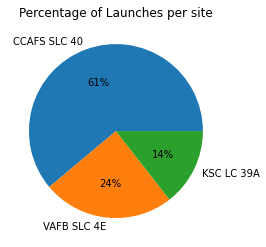

In [12]:

df[df['LaunchSite'] == 'CCAFS SLC 40']['PayloadMass'].describe()

LS_counts = df['LaunchSite'].value_counts()
LS_sum = LS_counts.sum()
#LS_counts = round((LS_counts / LS_sum) * 100, 1)
labels = ['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A']
LS_counts

plt.pie(LS_counts, labels=labels, autopct='%.0f%%')
plt.title('Percentage of Launches per site')


# Orbit type per launch pad

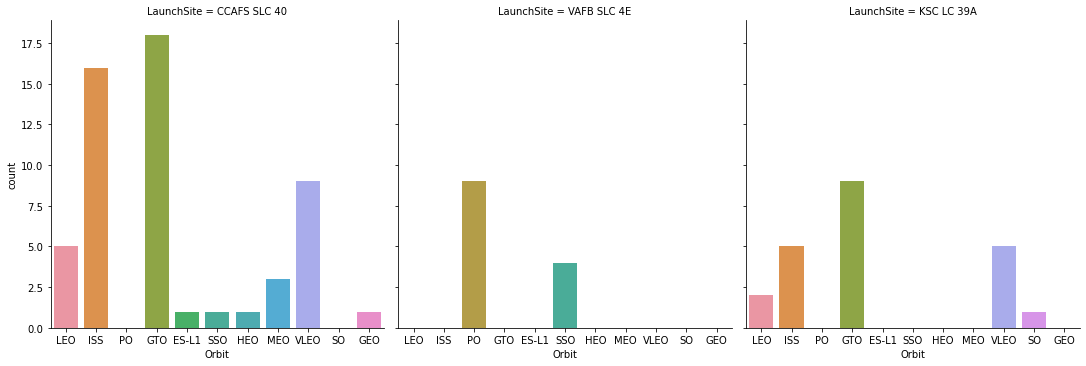

In [13]:
sns.catplot(x='Orbit', data=df, col='LaunchSite', kind='count')

# Point  3: Relationship between success rate of each orbit type

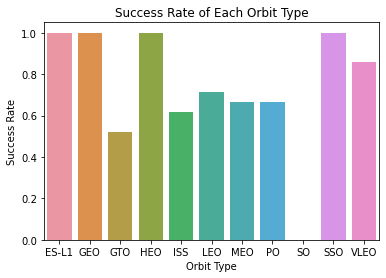

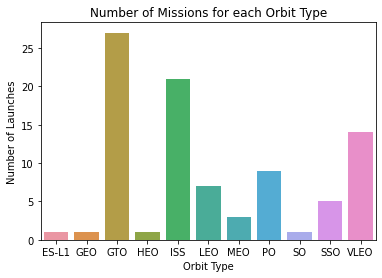

In [14]:

orbit_df = df.groupby(['Orbit']).mean()[['Class']]

orbit_count = pd.DataFrame(df['Orbit'].value_counts(sort=False))
orbit_count = orbit_count.rename(columns={'Orbit' : 'Launches'})

orbit_df = pd.concat([orbit_df, orbit_count], axis=1)

orbit_sum = orbit_df['Launches'].sum()

#normalized
#orbit_df['Normalized Class'] = (orbit_df['Launches'] / orbit_sum) * orbit_df['Class'] * 100

#Z score
orbit_df['Normalized Class'] = ((orbit_df['Launches'] - 0) / orbit_df['Launches'].std()) * orbit_df['Class'] * 100


orbit_df.reset_index(inplace=True)
orbit_df = orbit_df.rename(columns={'index' : 'Orbit'})

sns.barplot(x='Orbit', y='Class', data=orbit_df)
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate of Each Orbit Type')
plt.show()

sns.barplot(x='Orbit', y='Launches', data=orbit_df)
plt.xlabel('Orbit Type')
plt.ylabel('Number of Launches')
plt.title('Number of Missions for each Orbit Type')
plt.show()

## Normalized Launch Values

# Point 4:Relationship between FlightNumber and Orbit type

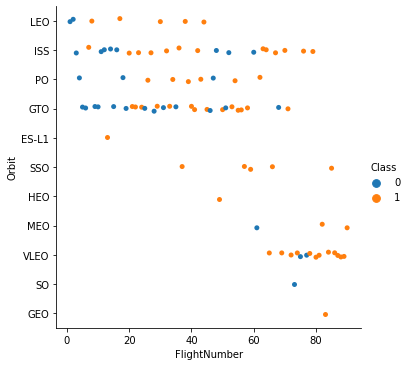

In [15]:
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df)

# TASK  5: Visualize the relationship between Payload and Orbit type

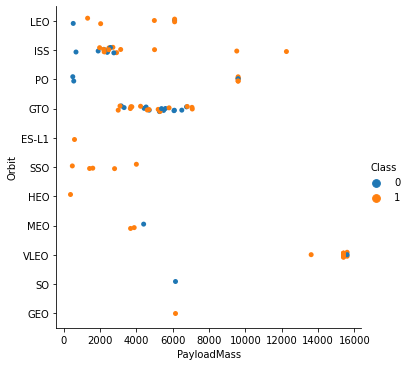

In [16]:
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df)

Text(0.5, 1.0, 'Success Plotted Against Fresh/Reused Rockets')

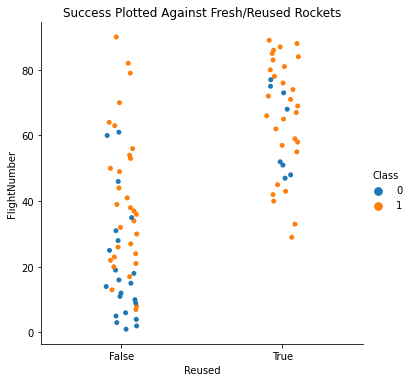

In [50]:
sns.catplot(y='FlightNumber', x='Reused', hue='Class', data=df)
plt.title('Success Plotted Against Fresh/Reused Rockets')


In [48]:
test_df = df[df['FlightNumber'] >= 28]

print(test_df[['Class']][test_df['Reused'] == True].value_counts())

print('Percentage of success for Reused Rockets: ', 29/37 * 100)

print(test_df[['Class']][test_df['Reused'] == False].value_counts())

print('Percentage of success for New Rockets: ', 31/53 * 100)



Class
1        29
0         8
dtype: int64
Percentage of success for Reused Rockets:  78.37837837837837
Class
1        20
0         6
dtype: int64
Percentage of success for New Rockets:  58.490566037735846


## Success of launches on yearly trend


## Success of launches by orbit type

## Success of launchs by weight

## Show a prediction algorithm to predict the launch of a rocket based on given parameters